In [118]:
import shap
import pandas as pd
import sklearn as sk

# load JS visualization code to notebook
shap.initjs()

In [192]:
# Read cervical cancer data
cerv = pd.read_csv("../../data/cervical.csv")
y = cerv["Biopsy"].values == "Cancer"
X = cerv.drop(["Biopsy"], axis=1)

mod = sk.ensemble.RandomForestClassifier(n_estimators = 30)
mod.fit(X,y)

explainer = shap.TreeExplainer(mod, X, model_output = "margin")
shap_values = explainer.shap_values(X)

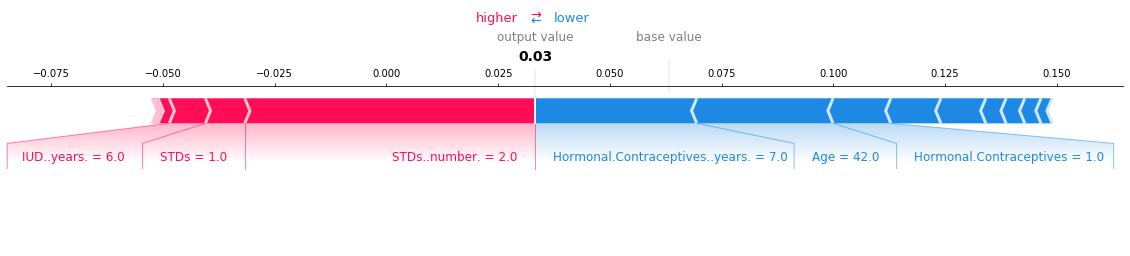

In [206]:
i = 18

# Explain individual predictions
shap.force_plot(explainer.expected_value[1], shap_values[1][i,:], X.iloc[i,:], matplotlib = True)

In [203]:
mod.predict_proba(X)[:,1].mean()

0.06322009780343114

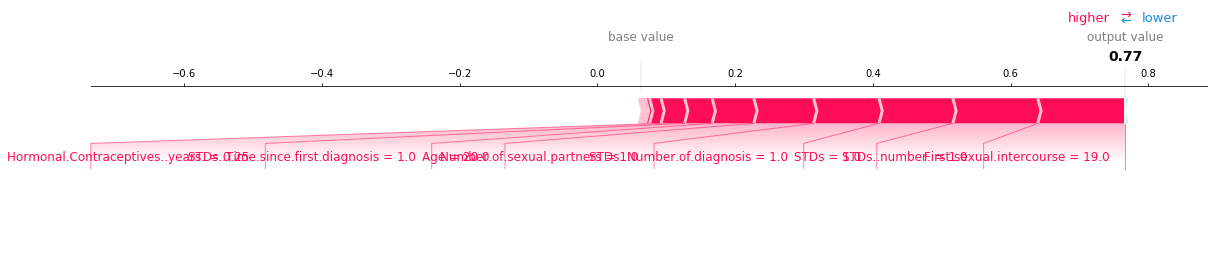

In [218]:
i = 325

# Explain individual predictions
shap.force_plot(explainer.expected_value[1], shap_values[1][i,:], X.iloc[i,:], matplotlib = True, text_rotation = 0)

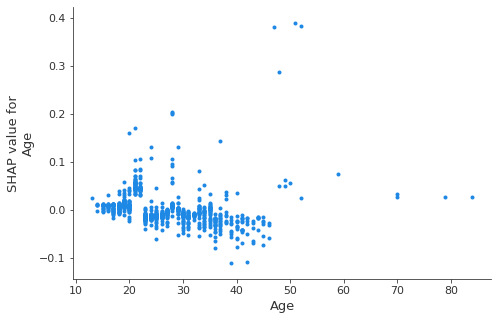

In [186]:
# Feature Effect
shap.dependence_plot("Age", shap_values, X, interaction_index=None)

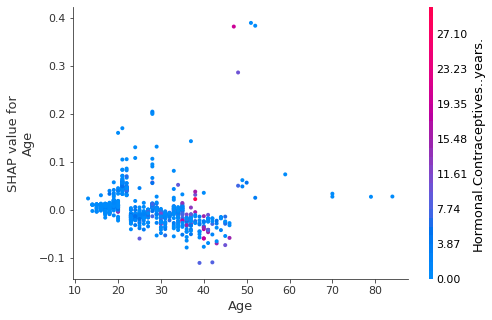

In [187]:
# Feature Effect with interaction
shap.dependence_plot("Age", shap_values, X, interaction_index=7)

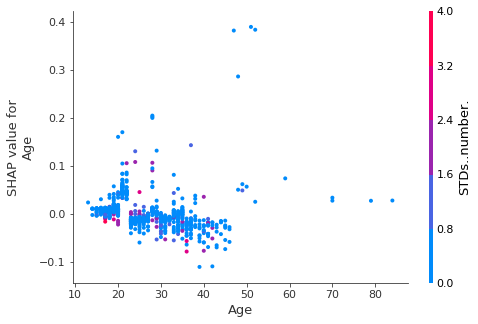

In [189]:
# Feature Effect with auto interaction detection
shap.dependence_plot("Age", shap_values, X)

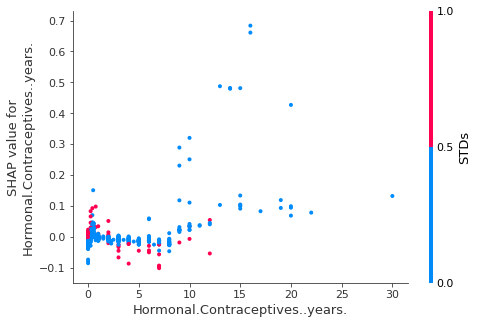

In [190]:
# Feature Effect with auto interaction detection
shap.dependence_plot("Hormonal.Contraceptives..years.", shap_values, X)

In [108]:
# Plot instance clustering
shap.force_plot(explainer.expected_value, shap_values, X)

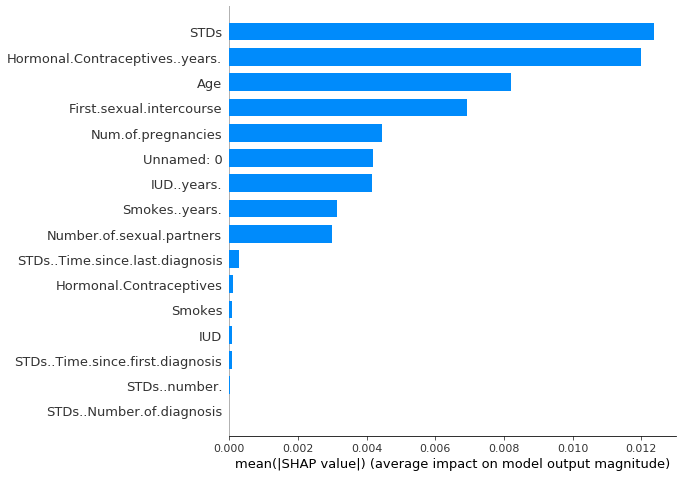

In [109]:
# Plot feature interaction

# Plot feature importance
shap.summary_plot(shap_values, X, plot_type = "bar")

In [110]:
shap_ia = explainer.shap_interaction_values(X, y)

In [111]:
shap_ia.shape

(858, 16, 16)

In [112]:
rf = sk.linear_model.LassoCV()
rf.fit(X, y)

/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [55]:
explainer = shap.KernelExplainer(rf.predict, X)

Using 858 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.


In [56]:
shap_values = explainer.shap_values(X, nsamples = 858)

/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/home/christoph/repos/interpretable-ml-book/scripts/shap/shap/lib/python3.6/site-packages/shap/explainers/kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional us

In [57]:
shap_values

array([[ 0.001651  ,  0.00516627,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00164714,  0.0069234 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00164329, -0.0042051 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.00164329,  0.00106629,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.00164714, -0.00361939,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.001651  , -0.00127655,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
shap.kmeans

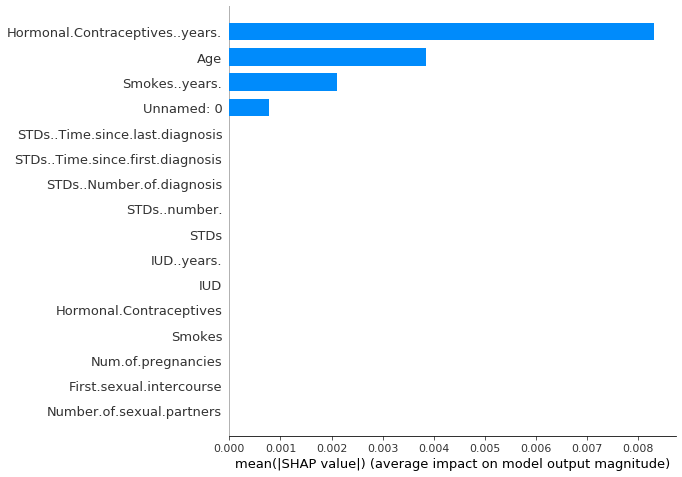

In [58]:
shap.summary_plot(shap_values, X, plot_type = "bar")

In [161]:
shap_values[1][i,:]

IndexError: too many indices for array

In [219]:
# Read cervical cancer data
cerv = pd.read_csv("../../data/bike.csv")
y = cerv["cnt"].values
X = cerv.drop(["cnt"], axis=1)

# Train model, e.g. random forest
#mod = xgboost.train({"learning_rate": 0.01},
#                    xgboost.DMatrix(X, label=y), 500)

mod = sk.ensemble.RandomForestRegressor(n_estimators = 30)
mod.fit(X,y)

explainer = shap.TreeExplainer(mod, X, model_output = "margin")
shap_values = explainer.shap_values(X)

ValueError: could not convert string to float: 'SPRING'